In [2]:
import torch
import matplotlib.pyplot as plt

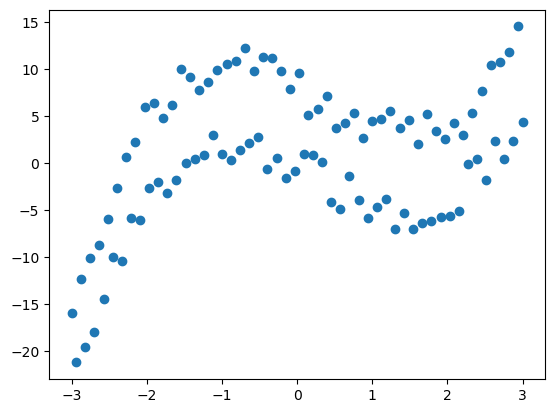

In [3]:
def f(x):
    return (x + 2) * (x - 1) * (x - 2)

x = torch.linspace(-3, 3, 100)
noise_scale = 5
y = torch.zeros_like(x)
y[::2] = f(x[::2]) + torch.rand(50) * noise_scale + noise_scale * 0.3
y[1::2] = f(x[1::2]) - torch.rand(50) * noise_scale - noise_scale * 0.3

plt.scatter(x, y)
plt.show()

In [4]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(3)

# Generate polynomial features
X_poly = poly.fit_transform(x.view(-1, 1))

/home/secondvoca/anaconda3/envs/torch/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
from sklearn.linear_model import LinearRegression

poly_reg_model = LinearRegression()
poly_reg_model.fit(X_poly, y)
y_predicted = poly_reg_model.predict(X_poly)

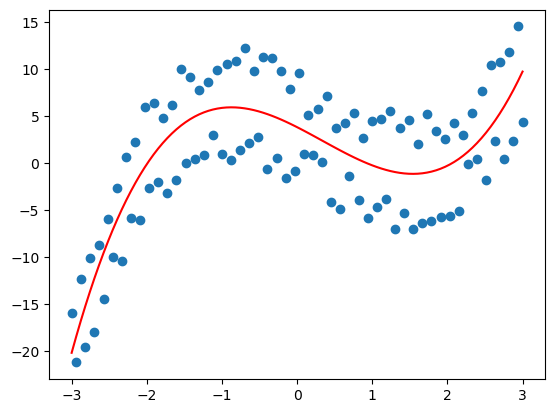

In [6]:
plt.scatter(x, y)
plt.plot(x, y_predicted, color='r')
plt.show()

In [9]:
# take a 10 sample point
tx = (torch.rand(30) - 0.5) * 6
tx_poly = poly.fit_transform(tx.view(-1, 1))
ty_predicted = poly_reg_model.predict(tx_poly)

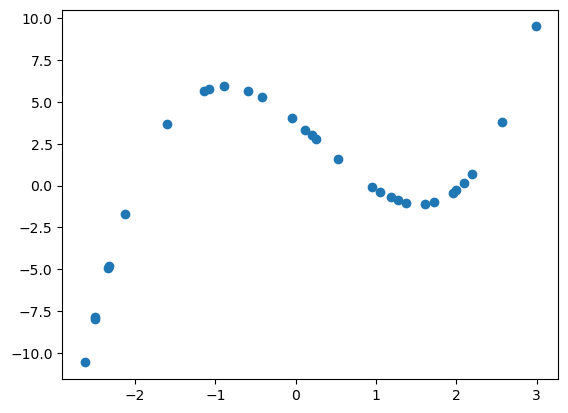

In [10]:
plt.scatter(tx, ty_predicted)

In [11]:
print(tx.shape)
print(ty_predicted.shape)

torch.Size([30])
(30,)


In [13]:
xy = torch.cat([x.view(-1, 1), y.view(-1, 1)], dim=1)
xy.shape

torch.Size([100, 2])

In [14]:
import torch.nn.functional as F

In [16]:
indices = []

for ttx, tty in zip(tx, ty_predicted):
    tp = torch.tensor([ttx, tty])
    vp = torch.stack([tp] * 100)
    loss = F.mse_loss(vp, xy, reduction='none').sum(dim=[1])
    min_idx = loss.argmin().item()
    indices.append(min_idx)

[6,
 87,
 61,
 87,
 6,
 22,
 13,
 54,
 64,
 11,
 13,
 19,
 55,
 84,
 51,
 87,
 31,
 58,
 58,
 61,
 92,
 87,
 22,
 61,
 89,
 61,
 52,
 22,
 55,
 41]

In [18]:
x[indices]

tensor([-2.6364,  2.2727,  0.6970,  2.2727, -2.6364, -1.6667, -2.2121,  0.2727,
         0.8788, -2.3333, -2.2121, -1.8485,  0.3333,  2.0909,  0.0909,  2.2727,
        -1.1212,  0.5152,  0.5152,  0.6970,  2.5758,  2.2727, -1.6667,  0.6970,
         2.3939,  0.6970,  0.1515, -1.6667,  0.3333, -0.5152])

In [19]:
y[indices]

tensor([ -8.7381,  -0.0978,  -1.3961,  -0.0978,  -8.7381,   6.1576,  -5.8252,
          5.7648,   2.6783, -10.3498,  -5.8252,  -1.9885,   0.1145,   4.2510,
          0.9641,  -0.0978,   3.0261,   3.6895,   3.6895,  -1.3961,  10.3987,
         -0.0978,   6.1576,  -1.3961,   0.4207,  -1.3961,   5.1655,   6.1576,
          0.1145,   2.8180])

In [20]:
from sklearn.preprocessing import PolynomialFeatures

poly_2 = PolynomialFeatures(3)

# Generate polynomial features
X_poly_2 = poly_2.fit_transform(x[indices].view(-1, 1))

In [22]:
from sklearn.linear_model import LinearRegression

poly_reg_model_2 = LinearRegression()
poly_reg_model_2.fit(X_poly_2, y[indices])
y_predicted_2 = poly_reg_model_2.predict(X_poly)

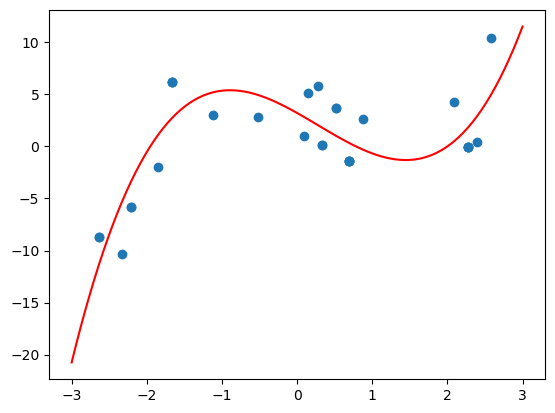

In [23]:
plt.scatter(x[indices], y[indices])
plt.plot(x, y_predicted_2, color='r')
plt.show()

In [28]:
from myAE import Manager

In [29]:
manager = Manager()
manager.prepare_data()

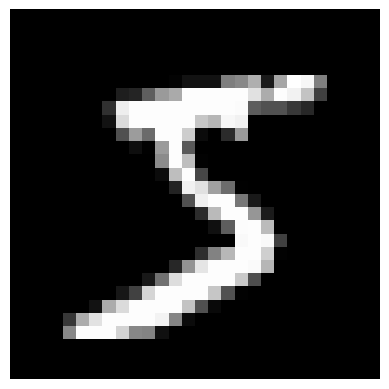

In [32]:
plt.imshow(manager.training_data[0].view(28, 28), cmap='gray')
plt.axis('off')
plt.show()